### **Importing Libraries**

In [1059]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### **Loading Data**

In [1060]:
AnemiaDataset = pd.read_csv("Dataset/anaemia_dataset.csv")
AnemiaDataset

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


In [1061]:
AnemiaDataset.isna().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [1062]:
AnemiaDataset.duplicated().sum()

0

In [1063]:
AnemiaDataset.head(10)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
5,6,M,45.0994,27.9645,26.9361,16.2,No
6,7,F,43.1457,30.1628,26.6915,8.6,Yes
7,8,F,43.6103,29.1099,27.2798,10.3,No
8,9,F,45.0423,29.1660,25.7918,13.0,No
9,10,F,46.5143,27.4282,26.0575,9.7,Yes


In [1064]:
AnemiaDataset.tail(10)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
94,95,F,42.5314,30.9742,26.4944,8.7,Yes
95,96,M,52.1540,26.0853,21.7607,16.0,No
96,97,F,51.5802,28.2678,20.1520,13.2,No
97,98,M,48.3681,26.9220,24.7099,12.5,No
98,99,M,47.3260,27.2780,25.3960,13.0,No
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No
103,104,F,43.5706,29.8094,26.6199,12.2,No


In [1065]:
AnemiaDataset.shape

(104, 7)

In [1066]:
AnemiaDataset.Sex.value_counts()

Sex
M     29
M     26
F     26
F     23
Name: count, dtype: int64

In [1067]:
AnemiaDataset["Sex"] = AnemiaDataset["Sex"].replace(["M ", "F "], ["M", "F"])

In [1068]:
AnemiaDataset.Anaemic.value_counts()

Anaemic
No     78
Yes    26
Name: count, dtype: int64

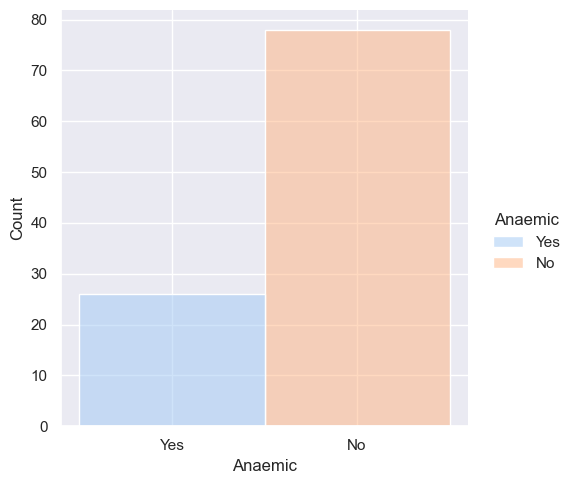

In [1069]:
sns.set(style="darkgrid", palette="pastel")
sns.displot(AnemiaDataset, x="Anaemic", hue="Anaemic")
plt.show()

In [1070]:
AnemiaDataset.Sex.value_counts()

Sex
M    55
F    49
Name: count, dtype: int64

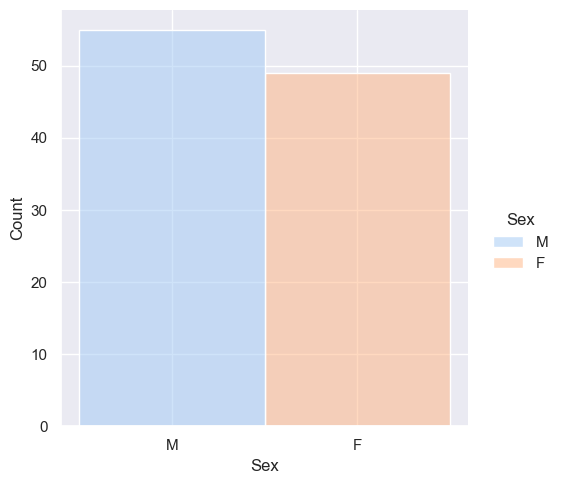

In [1071]:
sns.set(style="darkgrid", palette="pastel")
sns.displot(AnemiaDataset, x="Sex", hue="Sex")
plt.show()

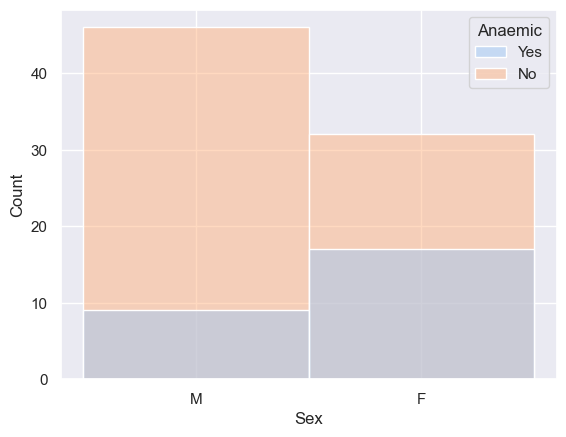

In [1072]:
sns.set(style="darkgrid", palette="pastel")
sns.histplot(AnemiaDataset, x="Sex", hue="Anaemic")
plt.show()

In [1073]:
AnemiaDataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,104.0,52.500000,30.166206,1.0000,26.750000,52.50000,78.250000,104.0000
%Red Pixel,104.0,45.654175,2.816294,38.7968,43.911375,45.38535,46.968325,54.6478
%Green pixel,104.0,28.875507,1.554275,25.1403,27.871300,28.94875,29.887275,32.3681
%Blue pixel,104.0,25.470325,1.984671,19.5413,24.896425,25.95320,26.721600,29.8414
Hb,104.0,12.150962,2.512957,2.8000,10.650000,12.60000,14.000000,16.3000


In [1074]:
AnemiaDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [1075]:
AnemiaDataset.drop({"Number","Sex"}, axis=1, inplace=True)

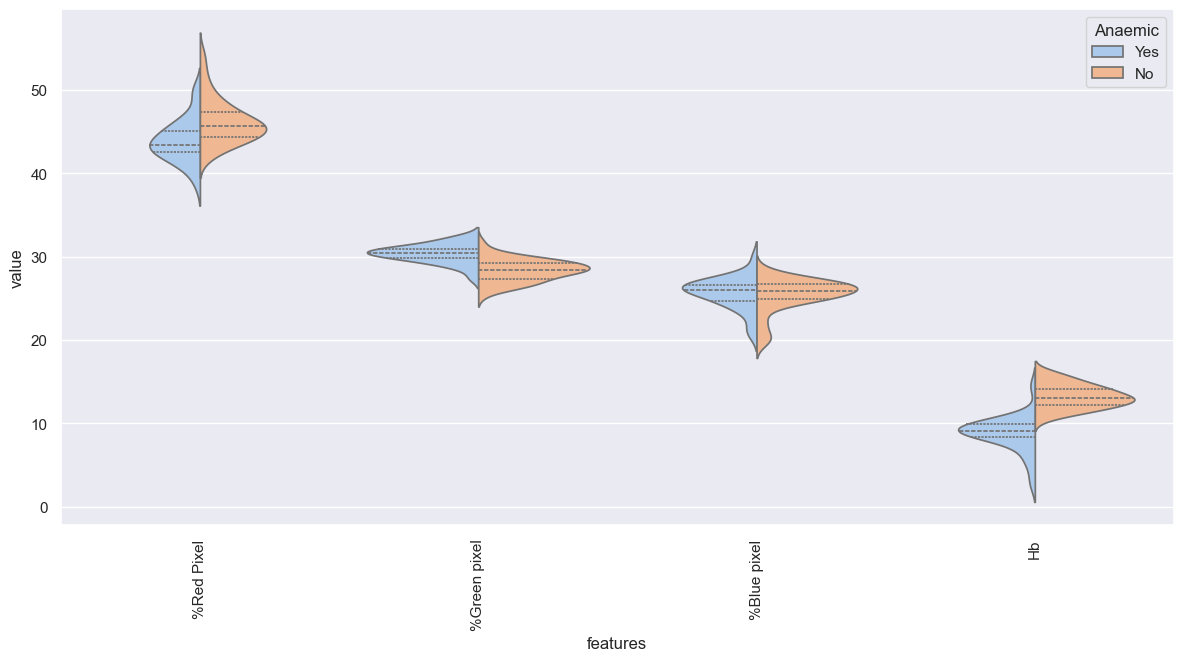

In [1076]:
sns.set(style="darkgrid", palette="pastel")
plt.figure(figsize=(12,6))
violin_plot = pd.melt(AnemiaDataset, id_vars="Anaemic", var_name="features", value_name="value")
sns.violinplot(violin_plot, x="features", y="value", hue="Anaemic", split=True, inner="quart")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [1077]:
features = ["%Red Pixel", "%Green pixel", "%Blue pixel", "Hb"]
target = "Anaemic"

In [1078]:
corr_matrix = AnemiaDataset[features].corr()
corr_matrix

,%Red Pixel,%Green pixel,%Blue pixel,Hb
%Red Pixel,1.000000,-0.732003,-0.845764,0.424586
%Green pixel,-0.732003,1.000000,0.255589,-0.637340
%Blue pixel,-0.845764,0.255589,1.000000,-0.103373
Hb,0.424586,-0.637340,-0.103373,1.000000


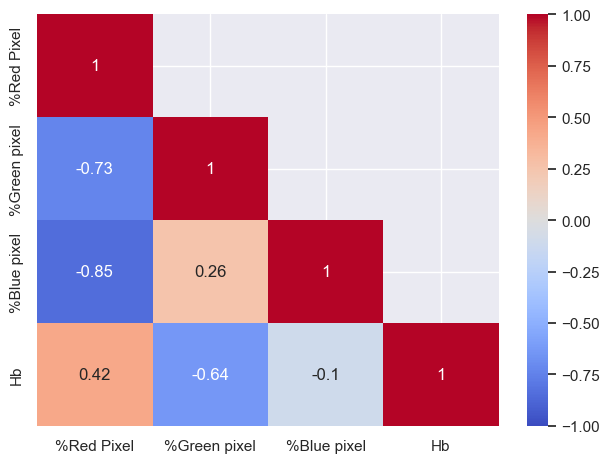

In [1079]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, mask=mask, cmap="coolwarm")
plt.tight_layout()
plt.show()

In [1080]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, features)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['%Red Pixel', '%Green pixel',
                                                   '%Blue pixel', 'Hb'])])),
                ('classifier', LogisticRegression())])

In [1081]:
X = AnemiaDataset[features]
y = AnemiaDataset[target]

y.replace(to_replace="Yes", value=1, inplace=True)
y.replace(to_replace="No", value=0, inplace=True)

C:\Users\westm\AppData\Local\Temp\ipykernel_4160\1710921139.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace(to_replace="No", value=0, inplace=True)


In [1082]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1083]:
X_train.head(10), len(X_train)

(     %Red Pixel  %Green pixel  %Blue pixel    Hb
 103     43.5706       29.8094      26.6199  12.2
 78      42.4532       30.9448      26.6020   9.2
 28      47.8913       27.0952      25.0135  14.6
 79      44.3346       30.4043      25.2611   8.0
 5       45.0994       27.9645      26.9361  16.2
 62      45.8483       27.2043      26.9474  15.5
 56      49.1475       28.2711      22.5813  12.6
 39      46.1449       27.7085      26.1466  14.1
 35      45.2588       28.0079      26.7333  12.6
 16      42.5358       30.1604      27.3039  10.0,
 72)

In [1084]:
X_test.head(10), len(X_test)

(    %Red Pixel  %Green pixel  %Blue pixel    Hb
 30     44.2572       29.6578      26.0850  12.9
 65     45.4201       29.4684      25.1115  12.0
 64     38.7968       31.3618      29.8414   8.5
 53     47.1003       28.3195      24.5801  12.4
 45     46.9428       27.2219      25.8353  13.3
 93     47.7549       26.2457      25.9994  15.2
 91     43.1425       30.2890      26.5686   9.5
 47     45.7581       27.2867      26.9553  11.8
 10     45.3506       29.1248      25.5246  12.6
 0      43.2555       30.8421      25.9025   6.3,
 32)

In [1085]:
y_train.head(10), len(y_train)

(103    0
 78     1
 28     0
 79     1
 5      0
 62     0
 56     0
 39     0
 35     0
 16     1
 Name: Anaemic, dtype: int64,
 72)

In [1086]:
y_test.head(10), len(y_test)

(30    0
 65    0
 64    1
 53    0
 45    0
 93    0
 91    1
 47    0
 10    0
 0     1
 Name: Anaemic, dtype: int64,
 32)

In [1087]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

acc_score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [1088]:
acc_score

0.9375

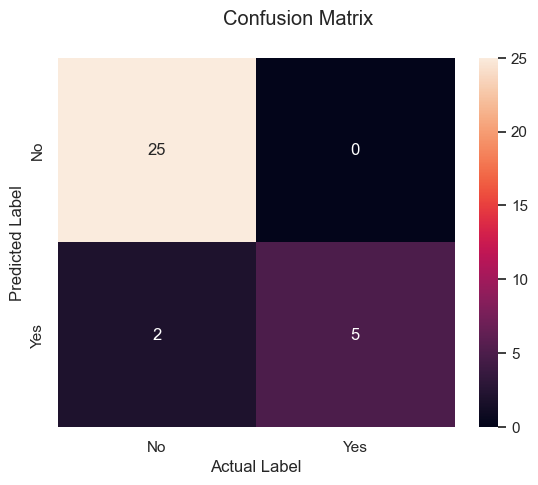

In [1089]:
sns.set(style="darkgrid", palette="pastel")
plt.suptitle("Confusion Matrix")
sns.heatmap(conf_matrix, annot=True, xticklabels=["No", "Yes"], yticklabels=["No","Yes"])
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()

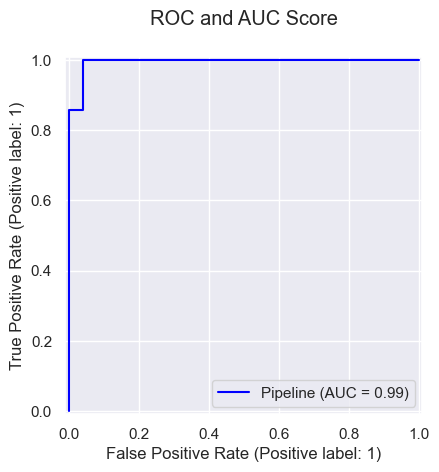

In [1095]:
sns.set(style="darkgrid", palette="pastel")
RocCurveDisplay.from_estimator(estimator=pipeline, X=X_test, y=y_test, color="blue")
plt.suptitle("ROC and AUC Score")
plt.tight_layout()
plt.show()